### Importing necessary libraries

In [60]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib                                             
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from bokeh.layouts import column                                    # To build a grid of plots and widgets
from bokeh.plotting import Figure                                   # Create a new figure for plotting
from bokeh.plotting import show                                     # Show the figure result
from bokeh.plotting import output_notebook                          # Helper that enables ouput in the notebook
from bokeh.plotting import output_file                              # Generate output saved to a file when show() is called
from bokeh.models import ColumnDataSource                           # Populate columns by making Ajax calls to REST endpoints
from bokeh.models import CustomJS                                   # Attaches CustomJS callbacks to property change events
from bokeh.models import Slider                                     # For custom JS slider widgets
from bokeh.models import HoverTool                                  # Displays informational tooltips over a glyph
from bokeh.io import push_notebook                                  # Update Bokeh plots in a Jupyter notebook output
output_notebook()
#-------------------------------------------------------------------------------------------------------------------------------
import plotly
from plotly import graph_objs as go                                 # Contains an auto-generated hierarchy of Python classes
from plotly.offline import iplot                                    # Display Figures in offline mode
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Creates UI controls for exploring code and data
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#---------------------------------------------------------------------------------------------------------------------------------
# Model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#---------------------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
#------------------------------------------------------------------------------------------------------------------------------
# Data pre-processing and EDA lib.
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------------------------------------------------------------------------
# multicolineartiy test and treatment libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor


#Model evaulation libaries 
from sklearn.metrics import r2_score, mean_squared_error



Loading BokehJS ...

In [58]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_excel('Capstone Project.xlsx')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30000,212.00000,0.00000,203.50000,0.00000,971.80000,748.50000,28,29.89000
1,168.90000,42.20000,124.30000,158.30000,10.80000,1080.80000,796.20000,14,23.51000
2,250.00000,0.00000,95.70000,187.40000,5.50000,956.90000,861.20000,28,29.22000
3,266.00000,114.00000,0.00000,228.00000,0.00000,932.00000,670.00000,28,45.85000
4,154.80000,183.40000,0.00000,193.30000,9.10000,1047.40000,696.70000,28,18.29000


## Predict strength of cement of studing 8 independent features 

### EDA

In [4]:
df.shape

(1030, 9)

In [5]:
df.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
70,200.00000,133.00000,0.00000,192.00000,0.00000,965.40000,806.20000,3,11.41000
226,167.40000,129.90000,128.60000,175.50000,7.80000,1006.30000,746.60000,56,51.72000
114,302.00000,0.00000,0.00000,203.00000,0.00000,974.00000,817.00000,14,18.13000
854,387.00000,20.00000,94.00000,157.00000,11.60000,938.00000,845.00000,3,34.77000
977,298.00000,0.00000,107.00000,210.00000,11.00000,880.00000,744.00000,28,31.87000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation from df.info
1. There are no null values
2. We have 1030 rows 9 columns 
3. Except age all the columns data type is Float
4. Dependent variable is strength and rest are independet variables


In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.00000,1030.00000,1030.00000,1030.00000,1030.00000,1030.00000,1030.00000,1030.00000,1030.00000
mean,281.16786,73.89583,54.18835,181.56728,6.20466,972.91893,773.58049,45.66214,35.81796
std,104.50636,86.27934,63.99700,21.35422,5.97384,77.75395,80.17598,63.16991,16.70574
min,102.00000,0.00000,0.00000,121.80000,0.00000,801.00000,594.00000,1.00000,2.33000
25%,192.37500,0.00000,0.00000,164.90000,0.00000,932.00000,730.95000,7.00000,23.71000
50%,272.90000,22.00000,0.00000,185.00000,6.40000,968.00000,779.50000,28.00000,34.44500
75%,350.00000,142.95000,118.30000,192.00000,10.20000,1029.40000,824.00000,56.00000,46.13500
max,540.00000,359.40000,200.10000,247.00000,32.20000,1145.00000,992.60000,365.00000,82.60000


Analysis from Descriptive statistics:
1. There might be skwness in data 
2. There might be chance of outliers if we compare quartiles of some of the features.(ash, slg, superplastic)
3. Since min & Q1 value is same for salg & ash, we can say that we don't have outliers in the lower wisker region
4. Range of age is from 1 to 365 days 

In [8]:
def Custome_Summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                "Feature Name" :col,
                "Count": my_df[col].count(),
                "Minimum": my_df[col].min(),
                "Quartile1" : my_df[col].quantile(0.25),
                "Quartile2" : my_df[col].quantile(0.50),
                "Quartile3" : my_df[col].quantile(0.75),
                "Mean": my_df[col].mean(),
                "Variance": round(my_df[col].var()),
                "Standar_Deviation": my_df[col].std(),
                "Skewness" : my_df[col].skew(),
                "Kurtosis" : my_df[col].kurt()
                
                
            })
            result.append(stats)
    result_df = pd.DataFrame(result)
    #Skwness type :
    Skwness_lable  = []
    for i in result_df["Skewness"]:
        if i <=-1 :
            Skwness_lable.append("Highly negative skew ")
        elif -1 < i <= -0.5:
            Skwness_lable.append("Moderately  negative skew ")
    
        elif -0.5 < i < 0:
            Skwness_lable.append(" Fairly  negative skew ")
        elif 0 <= i < 0.5:
            Skwness_lable.append(" Fairly  Postive skew ")
        elif 0.5 <= i < 1:
            Skwness_lable.append(" Moderately Positive  skew ")
        elif i >= 1:
            Skwness_lable.append("Highly Positive  skew ")
        
    result_df["Skewness Comment "] = Skwness_lable 
     
    #Kurto type :
    Kurtosis_lable  = []
    for i in result_df["Kurtosis"]:
        if i >=  1 :
            Kurtosis_lable.append("Lepto  ")
        elif i <= -1:
            Kurtosis_lable.append("Plato  ")
        else :
            Kurtosis_lable.append(" Meso  ")
        
    result_df["Kurtosis Comment "] =  Kurtosis_lable 
    
    
    Outliers_lable = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.50)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            if len(my_df[(my_df[col]< LW)|(my_df[col] > UW)]) > 0:
                Outliers_lable.append("Have outliers")
            else:
                Outliers_lable.append("No Outliers")
    result_df["Outlier Comment"] = Outliers_lable
    
    return  result_df
                
        

In [9]:
Custome_Summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Quartile3,Mean,Variance,Standar_Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,cement,1030,102.00000,192.37500,272.90000,350.00000,281.16786,10922,104.50636,0.50948,-0.52065,Moderately Positive skew,Meso,No Outliers
1,slag,1030,0.00000,0.00000,22.00000,142.95000,73.89583,7444,86.27934,0.80072,-0.50818,Moderately Positive skew,Meso,Have outliers
2,ash,1030,0.00000,0.00000,0.00000,118.30000,54.18835,4096,63.99700,0.53735,-1.32875,Moderately Positive skew,Plato,No Outliers
3,water,1030,121.80000,164.90000,185.00000,192.00000,181.56728,456,21.35422,0.07463,0.12208,Fairly Postive skew,Meso,Have outliers
4,superplastic,1030,0.00000,0.00000,6.40000,10.20000,6.20466,36,5.97384,0.90720,1.41127,Moderately Positive skew,Lepto,Have outliers
5,coarseagg,1030,801.00000,932.00000,968.00000,1029.40000,972.91893,6046,77.75395,-0.04022,-0.59902,Fairly negative skew,Meso,No Outliers
6,fineagg,1030,594.00000,730.95000,779.50000,824.00000,773.58049,6428,80.17598,-0.25301,-0.10218,Fairly negative skew,Meso,Have outliers
7,age,1030,1.00000,7.00000,28.00000,56.00000,45.66214,3990,63.16991,3.26918,12.16899,Highly Positive skew,Lepto,Have outliers
8,strength,1030,2.33000,23.71000,34.44500,46.13500,35.81796,279,16.70574,0.41698,-0.31372,Fairly Postive skew,Meso,Have outliers


Analysis from  custom summary 
1. Cement has a mesokurtic curve which implies the data points are moderate in distance from the mean, so mean and SD are moderate.
2. Salg meso curve. 
3. Ash has a plto curve which implies the mean dose not represent whole data properly, so SD is high.
4. superplastic has a lepto curve which implies data points are closer to the mean.


## Performing Outlier treatment 

In [10]:
def replace_outlier(my_df,col,method = 'Quartile',strategy = 'Median'):
    col_data = my_df[col]
    if method == 'Quartile':
        # Using quartile to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.50)
        q3 = col_data.quantile(0.75) 
        IQR = q3 - q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR
        
    elif method == 'Standerd Deviation':
        # using SD method 
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std
        UW = mean + 2*std
    else:
        print("Pass a correct method")
    
    # Printing all the outliers 
    
    outliers = my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df),2)*100
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers ')
        print("\n")
    else:
        print(f'Feature {col} has outliers')
        print('\n')
        print(f'Total no. of outliers in {col} are {len(outliers)} ')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}% ')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    
    # Replacing outliers
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
    else:
        print('Pass a correct strategy')
        
    return my_df

## ODT Plots (Outlier detection technique)


1. Descriptive plots 
2. Histogram with outliers
3. Histogram without outliers


In [11]:
def odt_plots(my_df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25,8)) # one row and 3 colums 
    
    # Descriptive stat box plot 
    sns.boxplot(my_df[col],ax = ax1)
    ax1.set_title(col + 'boxplot')
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Boxplot")
    
    
    # Ploting Histogram with outliers
    sns.distplot(my_df[col],ax = ax2, fit = stats.norm)
    ax2.axvline(my_df[col].mean(), color = 'green')
    ax2.axvline(my_df[col].median(),color = 'brown')
    ax2.set_title(col + 'Histogram with outliers')
    ax2.set_ylabel("Density")
    ax2.set_xlabel("values")
    
    # Replacing outliers
    df_out = replace_outlier(my_df,col)
    
    
    # Ploting histogram without outliers 
    sns.distplot(df_out[col],ax = ax3,fit = stats.norm)
    ax3.axvline(df_out[col].mean(), color = 'green')
    ax3.axvline(df_out[col].median(),color = 'brown')
    ax3.set_title(col + 'Histogram without outliers')
    ax3.set_ylabel("Density")
    ax3.set_xlabel("values")
    plt.show()
    
    
    
    
    

Feature cement does not have outliers 




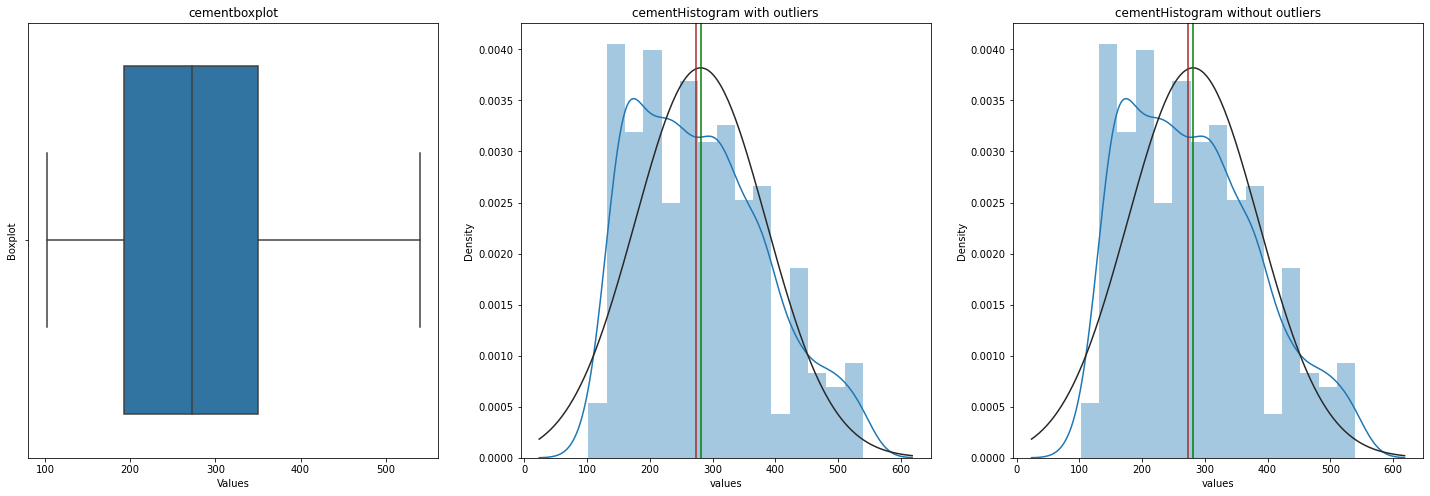

Feature slag has outliers


Total no. of outliers in slag are 2 


Outlier percentage in slag is 0.0% 




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.60000,359.40000,0.00000,185.70000,0.00000,941.60000,664.30000,28,39.44000
990,239.60000,359.40000,0.00000,185.70000,0.00000,941.60000,664.30000,7,25.42000


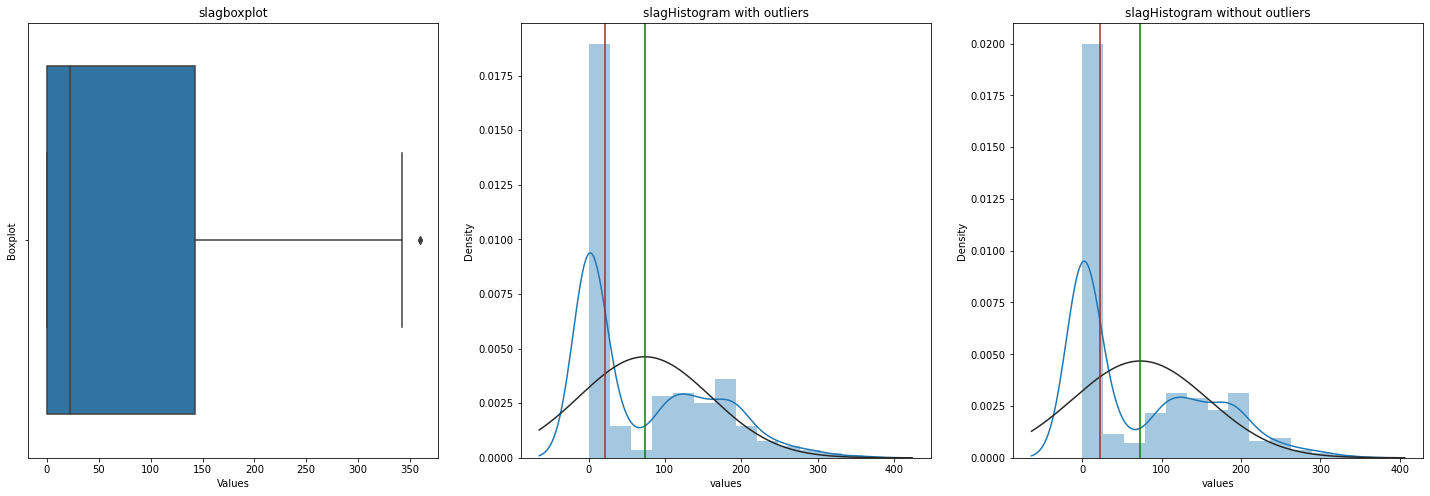

Feature ash does not have outliers 




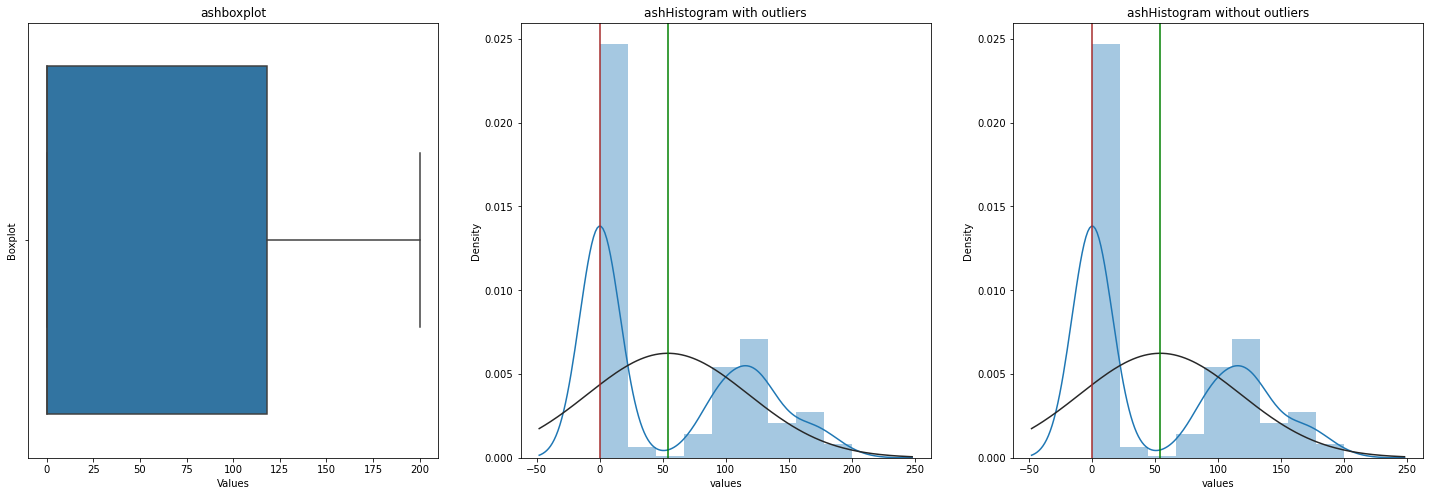

Feature water has outliers


Total no. of outliers in water are 9 


Outlier percentage in water is 1.0% 




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.00000,92.00000,71.00000,247.00000,6.00000,853.00000,695.00000,28,28.63000
263,236.90000,91.70000,71.50000,246.90000,6.00000,852.90000,695.40000,28,28.63000
432,168.00000,42.10000,163.80000,121.80000,5.70000,1058.70000,780.10000,28,24.24000
462,168.00000,42.10000,163.80000,121.80000,5.70000,1058.70000,780.10000,100,39.23000
587,168.00000,42.10000,163.80000,121.80000,5.70000,1058.70000,780.10000,3,7.75000
740,140.00000,164.00000,128.00000,237.00000,6.00000,869.00000,656.00000,28,35.23000
789,168.00000,42.10000,163.80000,121.80000,5.70000,1058.70000,780.10000,56,32.85000
826,139.70000,163.90000,127.70000,236.70000,5.80000,868.60000,655.60000,28,35.23000
914,168.00000,42.10000,163.80000,121.80000,5.70000,1058.70000,780.10000,14,17.82000


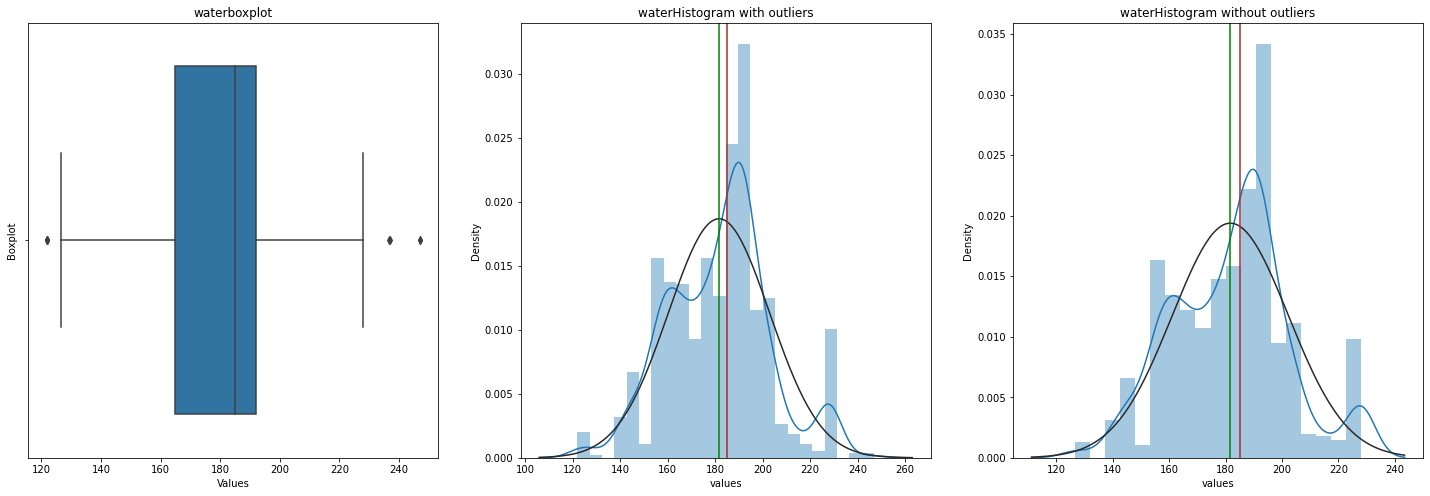

Feature superplastic has outliers


Total no. of outliers in superplastic are 10 


Outlier percentage in superplastic is 1.0% 




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.30000,0.00000,0.00000,141.80000,28.20000,852.10000,893.70000,91,59.20000
156,531.30000,0.00000,0.00000,141.80000,28.20000,852.10000,893.70000,28,56.40000
232,469.00000,117.20000,0.00000,137.80000,32.20000,852.10000,840.50000,56,69.30000
292,469.00000,117.20000,0.00000,137.80000,32.20000,852.10000,840.50000,91,70.70000
538,531.30000,0.00000,0.00000,141.80000,28.20000,852.10000,893.70000,7,46.90000
744,469.00000,117.20000,0.00000,137.80000,32.20000,852.10000,840.50000,7,54.90000
816,469.00000,117.20000,0.00000,137.80000,32.20000,852.10000,840.50000,28,66.90000
838,531.30000,0.00000,0.00000,141.80000,28.20000,852.10000,893.70000,56,58.80000
955,469.00000,117.20000,0.00000,137.80000,32.20000,852.10000,840.50000,3,40.20000
1026,531.30000,0.00000,0.00000,141.80000,28.20000,852.10000,893.70000,3,41.30000


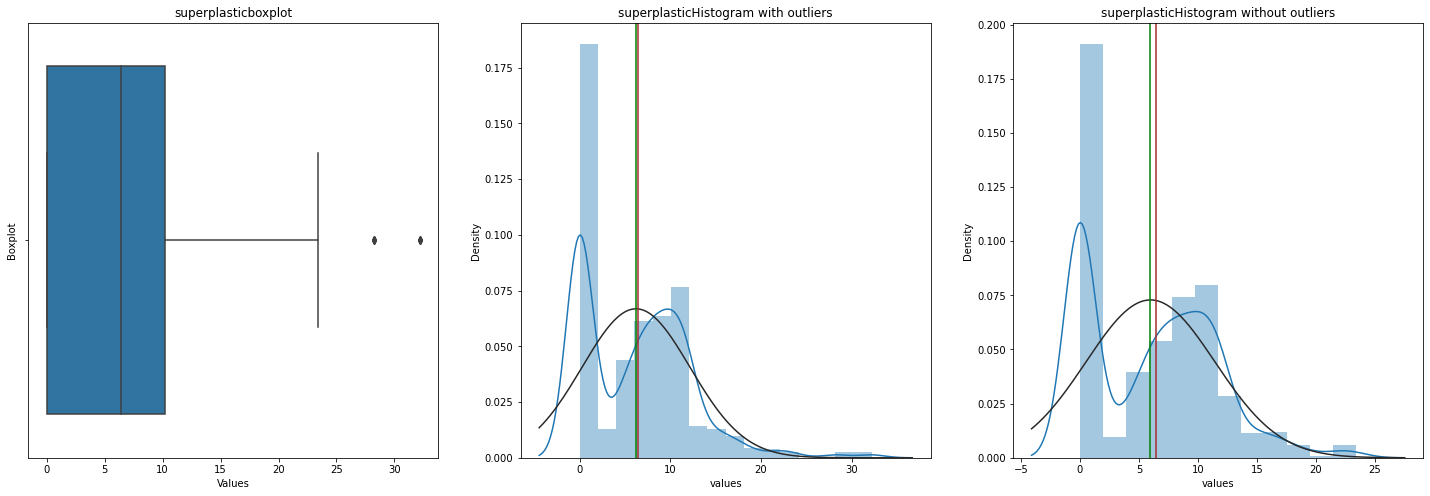

Feature coarseagg does not have outliers 




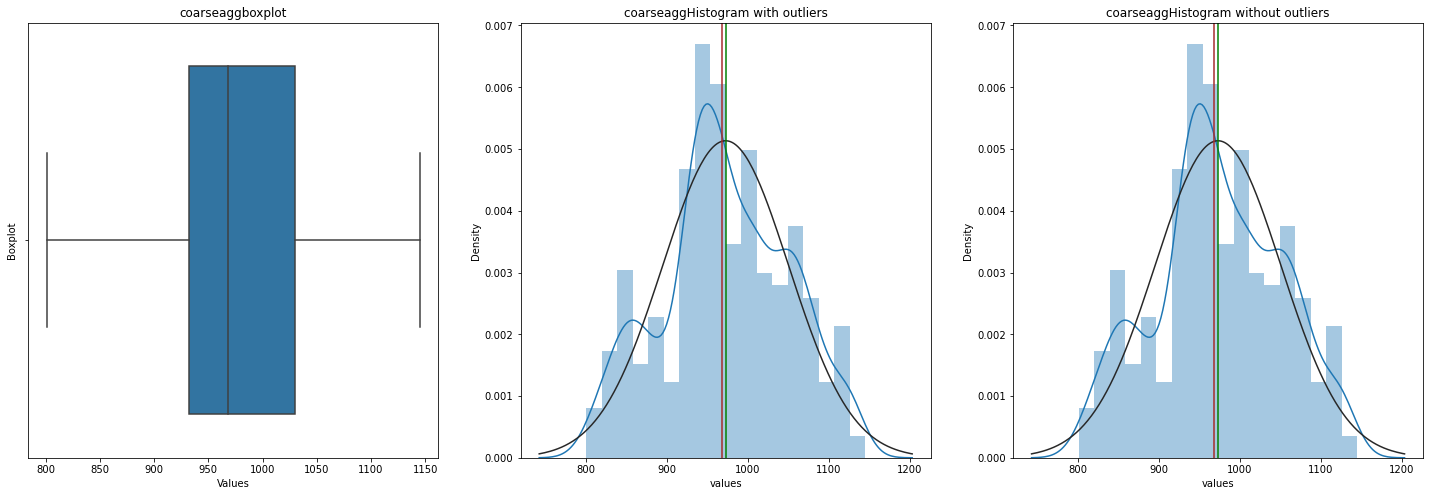

Feature fineagg has outliers


Total no. of outliers in fineagg are 5 


Outlier percentage in fineagg is 0.0% 




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.00000,93.80000,0.00000,126.60000,23.40000,852.10000,992.60000,91,62.50000
447,375.00000,93.80000,0.00000,126.60000,23.40000,852.10000,992.60000,7,45.70000
504,375.00000,93.80000,0.00000,126.60000,23.40000,852.10000,992.60000,3,29.00000
584,375.00000,93.80000,0.00000,126.60000,23.40000,852.10000,992.60000,56,60.20000
857,375.00000,93.80000,0.00000,126.60000,23.40000,852.10000,992.60000,28,56.70000


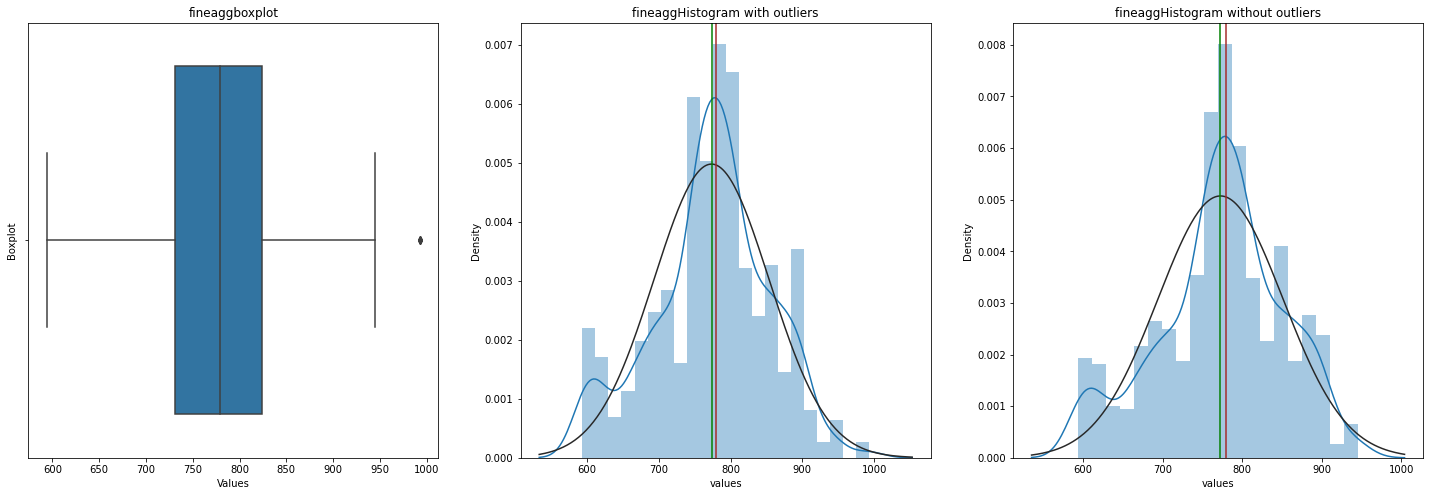

Feature age has outliers


Total no. of outliers in age are 59 


Outlier percentage in age is 6.0% 




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.00000,0.00000,0.00000,192.00000,0.00000,978.00000,825.00000,180,39.00000
64,332.50000,142.50000,0.00000,228.00000,0.00000,932.00000,594.00000,365,41.05000
93,427.50000,47.50000,0.00000,228.00000,0.00000,932.00000,594.00000,180,41.84000
99,237.50000,237.50000,0.00000,228.00000,0.00000,932.00000,594.00000,180,36.25000
103,380.00000,0.00000,0.00000,228.00000,0.00000,932.00000,670.00000,180,53.10000
133,236.00000,0.00000,0.00000,193.00000,0.00000,968.00000,885.00000,365,25.08000
144,302.00000,0.00000,0.00000,203.00000,0.00000,974.00000,817.00000,180,26.74000
149,380.00000,95.00000,0.00000,228.00000,0.00000,932.00000,594.00000,270,41.15000
152,322.00000,0.00000,0.00000,203.00000,0.00000,974.00000,800.00000,180,29.59000
157,198.60000,132.40000,0.00000,192.00000,0.00000,978.40000,825.50000,360,44.30000


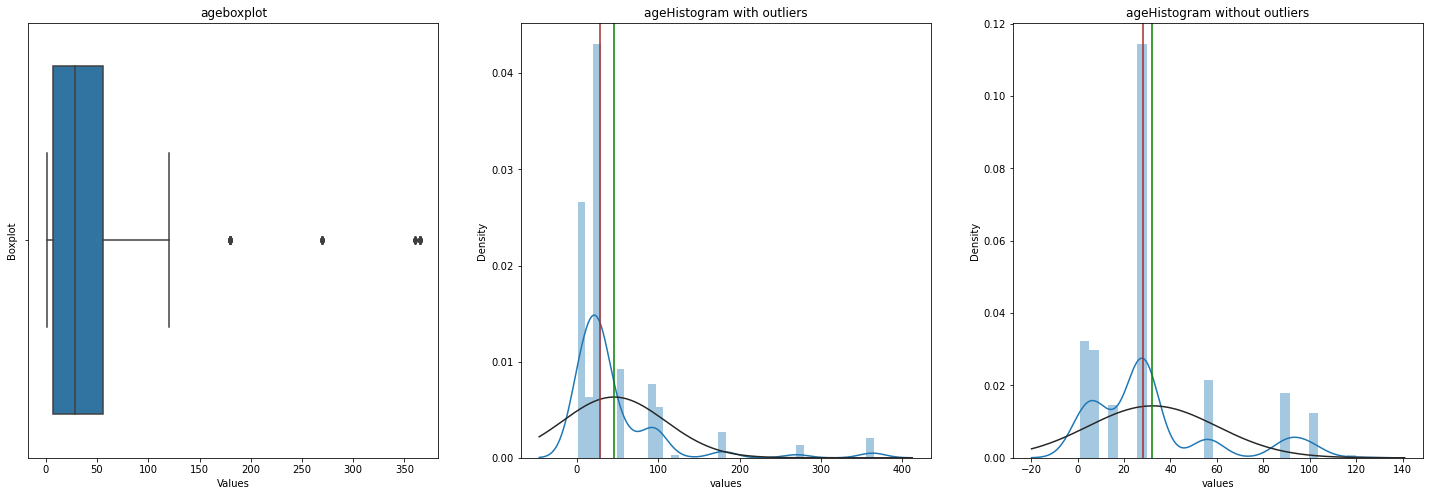

Feature strength has outliers


Total no. of outliers in strength are 4 


Outlier percentage in strength is 0.0% 




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.00000,137.00000,0.00000,145.00000,5.90000,1130.00000,745.00000,28,81.75000
732,540.00000,0.00000,0.00000,162.00000,2.50000,1040.00000,676.00000,28,79.99000
950,389.90000,189.00000,0.00000,145.90000,22.00000,944.70000,755.80000,91,82.60000
1003,323.70000,282.80000,0.00000,183.80000,10.30000,942.70000,659.90000,56,80.20000


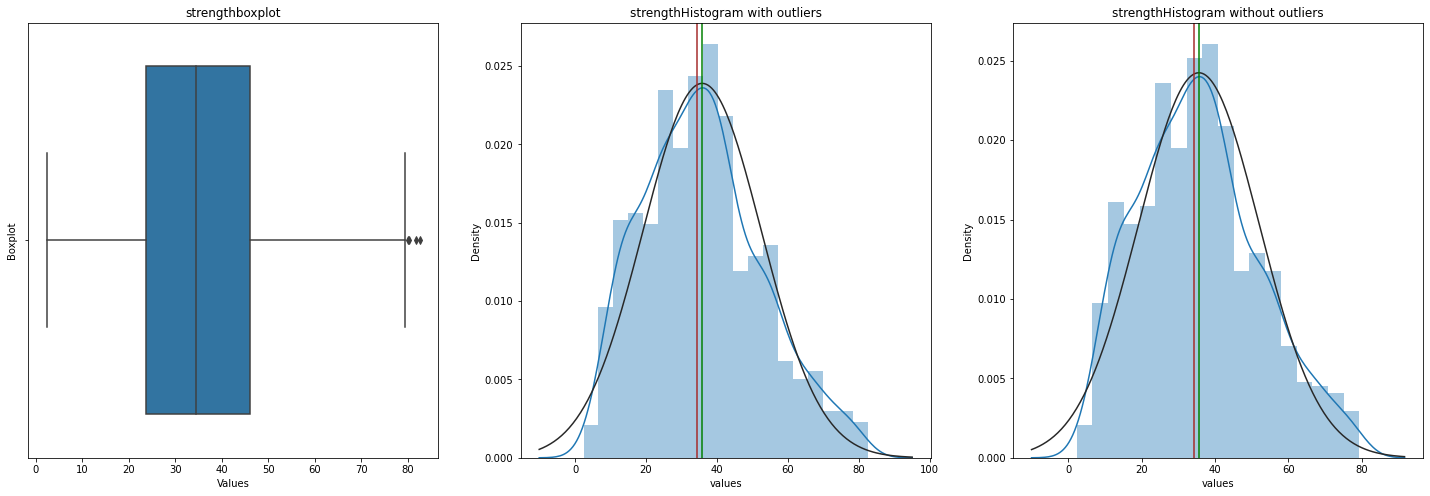

In [12]:
for col in df.columns:
    odt_plots(df,col)

## Multivariate Ananlysis using regression


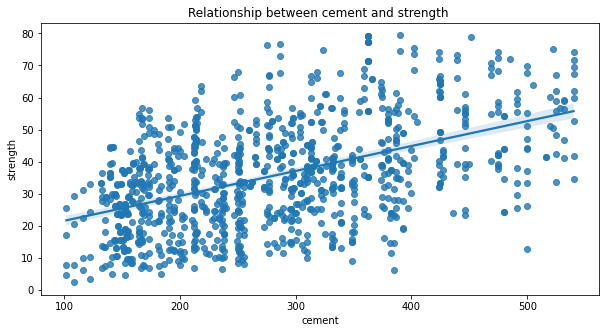

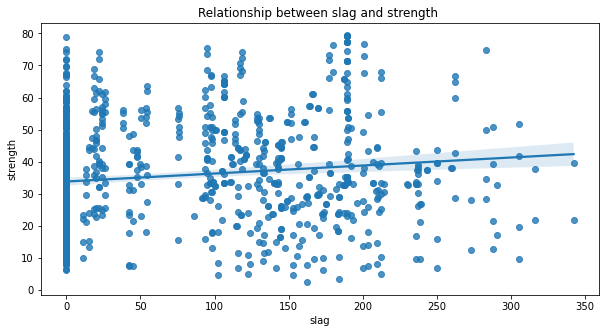

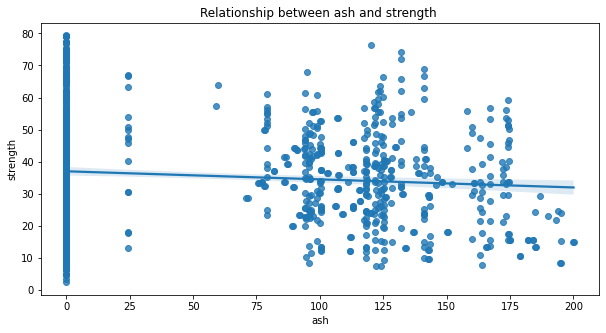

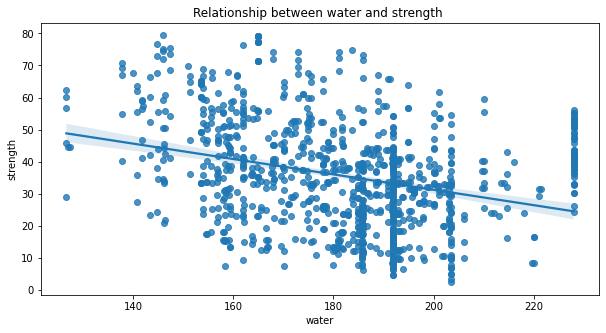

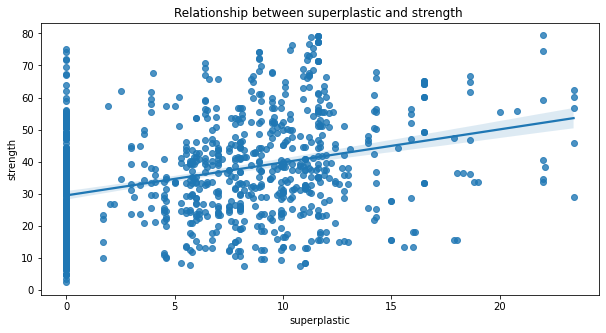

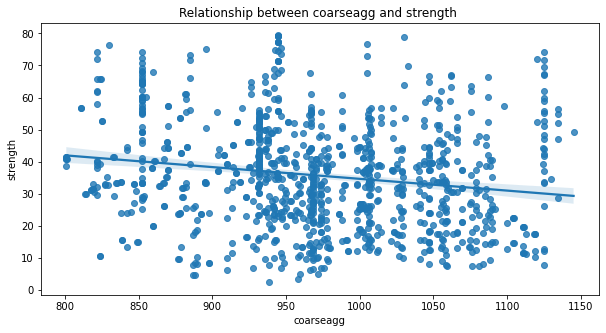

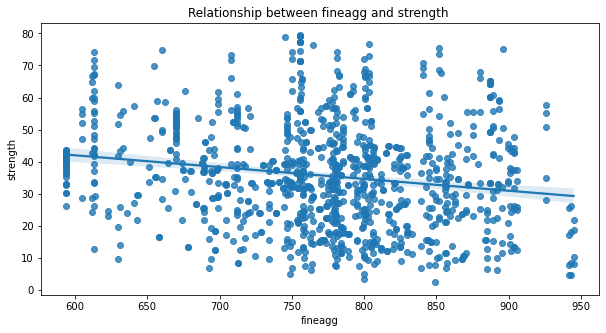

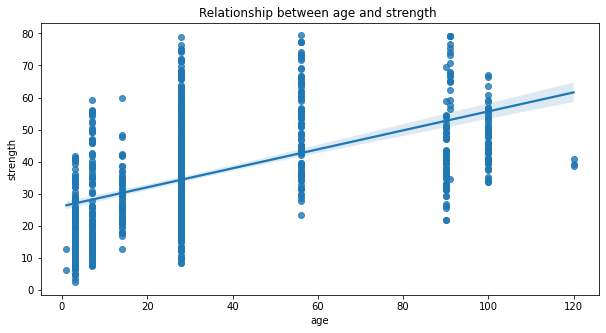

In [13]:
for col in df.columns:
    if col != "strength":
        fig,ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col],y=df['strength'],ax = ax1).set_title(f'Relationship between {col} and strength ')

Analysis from regression plots
1. strength and cement are highly postively correlated
2. strength and slag are slightly postively correlated
3. strength and ash are slightly negatively correlated
4. Strength and water are slightly negatively correlated
5. Strength and superplastic are highly correlated
6. Strength and coarseaggn are slightly negatively correlated
7. Strength and fineagg are slightly negatively correlated
8. Strength and age are highly postively correlated


## Test of multicoliearity test

- Correlation metrix/heat map (Stage-1)


<AxesSubplot:>

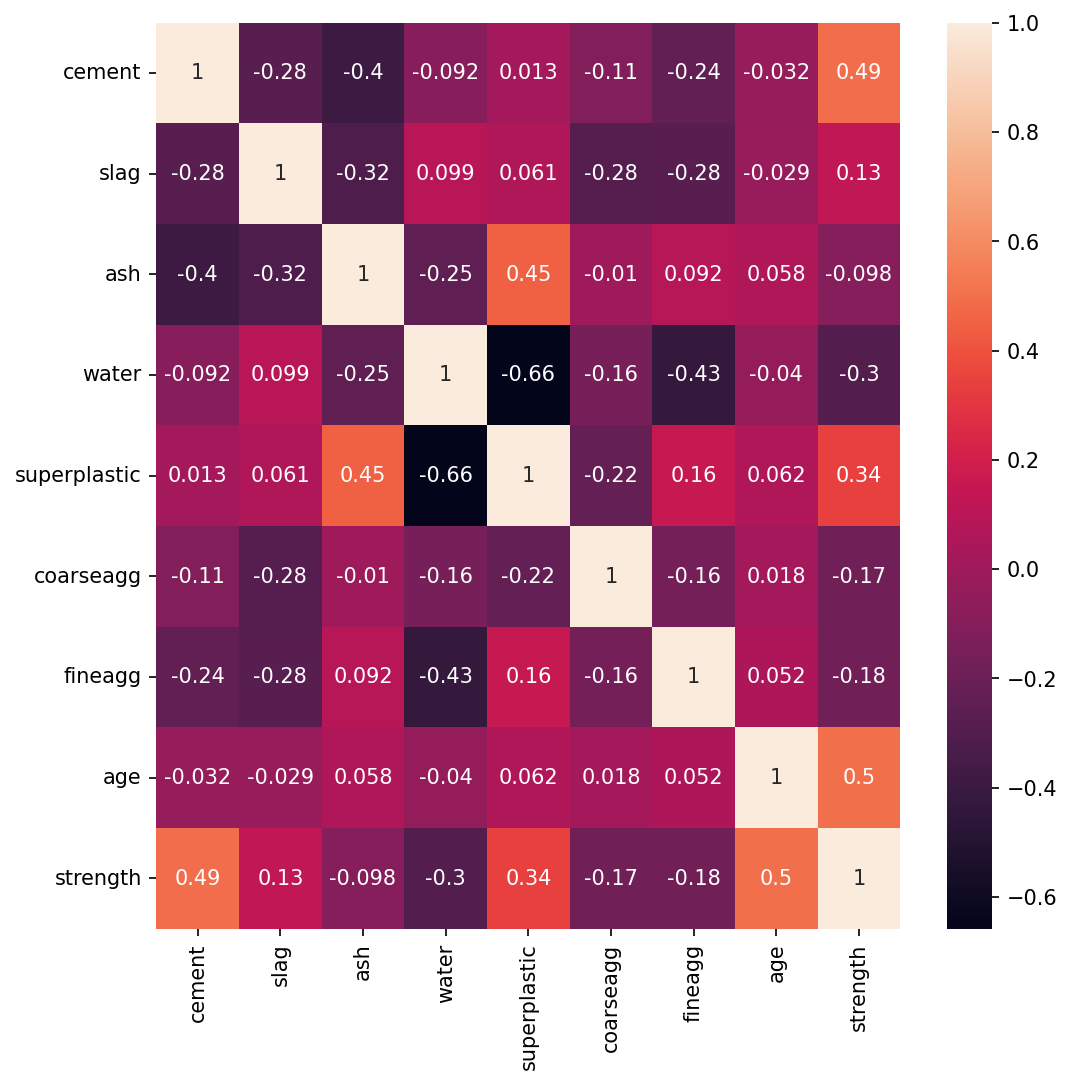

In [14]:
corr = df.corr()
df.ax = plt.subplots(figsize = (8,8), dpi = 150)
sns.heatmap(corr, annot = True)

 Analysis/ Result from stage 1 test
 1. Cement has highly positive correlation with ash, and strength 
 2. Slag has negatively high correlation with ash.
 3. ash negatively high correlation with cement and slag, Its also have higly positive correlation with superplastic.
 4. Water has highly negative correlation with superplastic and fineagg.
 
 - many feature have correlation more than 30% we can conclude stage one result that there is a chance of multi-collinearity in data

 ## Multicollinearity

- Variation inflation factor (VIF)
- formula for vif is equal to 1/(1-r2)


* steps to calculate Multicollinearity

1. Regress every independent varaible with each other and calculate the r2
2. Find VIF using above formula 
3. If vif more than 5, we say that multicolliearity exisits 
4. we dont accept multicolliearity above 20%


## VIF calculation 


## Correlation with target features

In [15]:
def correlation_with_target(data,t_col):
    independent_variable = data.drop(t_col,axis=1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
        
    result = pd.DataFrame([independent_variable,corr_result],index=['Independent Variables','Correlation']).T
    return result.sort_values('Correlation',ascending = True)


In [16]:
correlation_with_target(df,"strength")

,Independent Variables,Correlation
3,water,-0.30004
6,fineagg,-0.17611
5,coarseagg,-0.17323
2,ash,-0.09797
1,slag,0.12956
4,superplastic,0.34263
0,cement,0.49352
7,age,0.49971


Analysis
1. Age and cement has 49% correlation with strength
2. Superplastic and water has 34% and -30% correlation

In [17]:
def VIF(features): #function for calculation of VIF
    vif = pd.DataFrame(columns = ['VIF', 'Features'])
    vif.iloc[:, 0] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif.iloc[:, 1] = features.columns
    return vif


In [18]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

In [19]:
VIF(df)

,VIF,Features
0,27.48228,cement
1,4.31868,slag
2,4.64305,ash
3,86.43767,water
4,5.80993,superplastic
5,87.17158,coarseagg
6,68.66972,fineagg
7,4.42020,age
8,19.07437,strength


In [20]:
calculate_vif(df)

,features,VIF_Values
5,coarseagg,87.17000
3,water,86.44000
6,fineagg,68.67000
0,cement,27.48000
8,strength,19.07000
4,superplastic,5.81000
2,ash,4.64000
7,age,4.42000
1,slag,4.32000


Analysis from Stage 2 result 
1. 6 features have vif more than 5, so we can conclude that multicollinearity exisit in our data 

## PCA to treat multicollinearity 

In [21]:
def Custom_PCA(X):
    n_comp = len(X.columns)
    
    # Appling standar scaler for feature scaling
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained variance ratio after PCA is :',evr)
    
    #Creating a data frame of principle components 
    col = []
    for j in range(1,pcs+1):
        col.append('PC_'+ str(j))
        
    pca_df = pd.DataFrame(p_comp,columns=col)
    return pca_df
        

In [22]:
pca_df = Custom_PCA(df.drop('strength',axis=1))

Explained variance ratio after PCA is : [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [23]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1.81092,1.33166,-1.28448,-0.30615,-0.06765,-0.88611
1,-1.82383,-0.57344,-1.05897,0.89313,-0.91398,-0.75106
2,-0.73982,-0.46320,-0.54164,-1.03321,-0.30807,0.61105
3,2.76637,0.60298,-0.51253,0.00881,0.08642,0.85055
4,0.89252,0.96663,-0.86362,1.14856,-0.06444,-1.22123


## Joing PCA features with target feature 

In [24]:
pca_df = pca_df.join(df['strength'],how = 'left')

In [25]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,strength
0,1.81092,1.33166,-1.28448,-0.30615,-0.06765,-0.88611,29.89000
1,-1.82383,-0.57344,-1.05897,0.89313,-0.91398,-0.75106,23.51000
2,-0.73982,-0.46320,-0.54164,-1.03321,-0.30807,0.61105,29.22000
3,2.76637,0.60298,-0.51253,0.00881,0.08642,0.85055,45.85000
4,0.89252,0.96663,-0.86362,1.14856,-0.06444,-1.22123,18.29000


In [26]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30000,212.00000,0.00000,203.50000,0.00000,971.80000,748.50000,28,29.89000
1,168.90000,42.20000,124.30000,158.30000,10.80000,1080.80000,796.20000,14,23.51000
2,250.00000,0.00000,95.70000,187.40000,5.50000,956.90000,861.20000,28,29.22000
3,266.00000,114.00000,0.00000,228.00000,0.00000,932.00000,670.00000,28,45.85000
4,154.80000,183.40000,0.00000,193.30000,9.10000,1047.40000,696.70000,28,18.29000


## Model Building 
- Stages of model building
- custom train test split function 
- (to perform) cross validation 
- (to do hyper-parameter tuning) 

In [50]:
def train_and_test_split(data,t_col,testsize = 0.3,randomstate = 3):
    X = data.drop(t_col,axis = 1)
    y = data[t_col]
    return train_test_split(X,y,test_size = testsize,random_state=randomstate)
    

In [56]:
def model_builder(model_name,model,data,t_col):
    X_train, X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name,rmse,r2]
    return result

In [57]:
model_builder(model_name='LinearRegression',model = LinearRegression(),data = pca_df,t_col = 'strength')

['LinearRegression', 9.09802941314396, 0.7005612990763812]

In [63]:
def multiple_models(data,t_col):
    col_names = ['Model Name','RMSE','R2 Score']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = model_builder('LinearRegression',LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Lasso Regression',Lasso(),data,t_col)
    result.loc[len(result)] = model_builder('Ridge Regression',Ridge(),data,t_col)
    result.loc[len(result)] = model_builder('DTR',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)] = model_builder('RandomForestRegressor',RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('GBoost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('XGBoost',XGBRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('AdaBoost',AdaBoostRegressor(),data,t_col)
    return result.sort_values('R2 Score', ascending=False)

    

In [64]:
multiple_models(pca_df,'strength')

,Model Name,RMSE,R2 Score
8,XGBoost,5.95270,0.87181
5,RandomForestRegressor,6.37122,0.85316
7,GBoost,6.66084,0.83950
6,KNN,7.79888,0.77997
9,AdaBoost,8.88160,0.71464
3,DTR,8.94608,0.71048
0,LinearRegression,9.09803,0.70056
2,Ridge Regression,9.09998,0.70043
4,SVR,9.12398,0.69885
1,Lasso Regression,9.49411,0.67392


In [71]:
def K_fold_CV(X,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),X,y,cv = fold)
    score_ls = cross_val_score(Lasso(),X,y,cv = fold)
    score_rd = cross_val_score(Ridge(),X,y,cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(),X,y,cv = fold)
    score_svr = cross_val_score(SVR(),X,y,cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(),X,y,cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(),X,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),X,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(),X,y,cv = fold)
    score_adb = cross_val_score(AdaBoostRegressor(),X,y,cv = fold)
  
      
    
    model_name = ['LinearRegression','Lasso','Ridge','DecisionTreeRegressor','SVR','RandomForestRegressor','KNeighborsRegressor',
                 'GBoost','XGBoost','AdaBoost']
    scores = [score_lr,score_ls,score_rd,score_dtr,score_svr,score_rf,score_knn,score_gb,score_xgb,score_adb]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns=['Model Name','CV accuracy','CV Std'])
    return k_fold_df.sort_values('CV accuracy',ascending=False)
    

In [72]:
K_fold_CV(pca_df.drop('strength',axis = 1),pca_df['strength'])

,Model Name,CV accuracy,CV Std
8,XGBoost,0.87326,0.03606
5,RandomForestRegressor,0.86782,0.03221
7,GBoost,0.82912,0.05036
3,DecisionTreeRegressor,0.77698,0.06167
6,KNeighborsRegressor,0.76823,0.05604
9,AdaBoost,0.73443,0.03574
4,SVR,0.70312,0.04277
2,Ridge,0.66393,0.05944
0,LinearRegression,0.66393,0.05948
1,Lasso,0.64984,0.04989


In [27]:
df.duplicated().sum()

25

In [28]:
df.corr().iloc[:,1]

cement         -0.27505
slag            1.00000
ash            -0.32047
water           0.09888
superplastic    0.06119
coarseagg      -0.28388
fineagg        -0.28238
age            -0.02897
strength        0.12956
Name: slag, dtype: float64

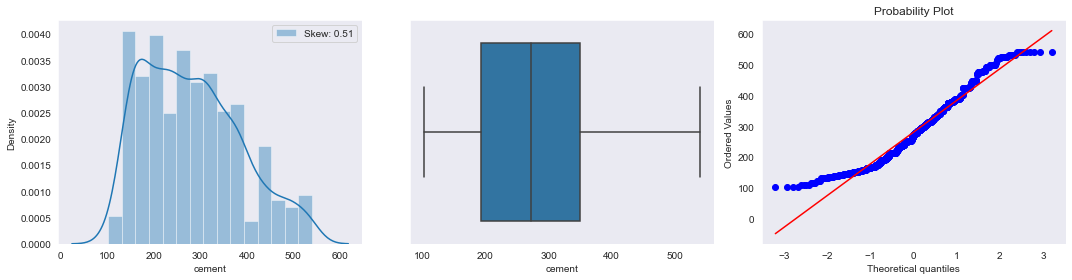

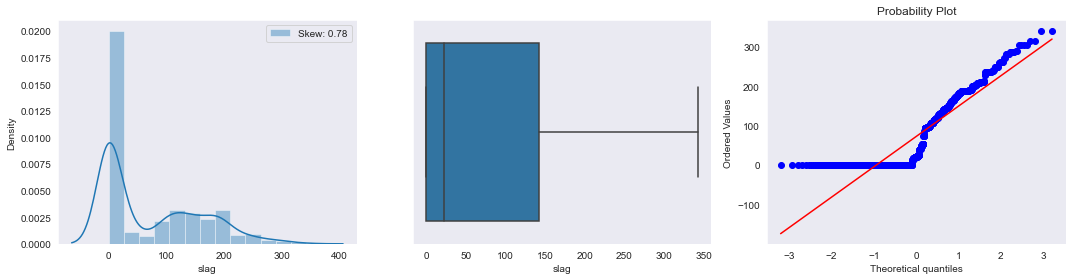

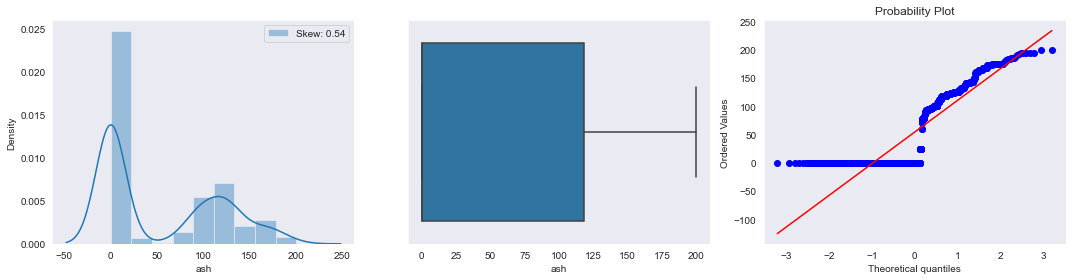

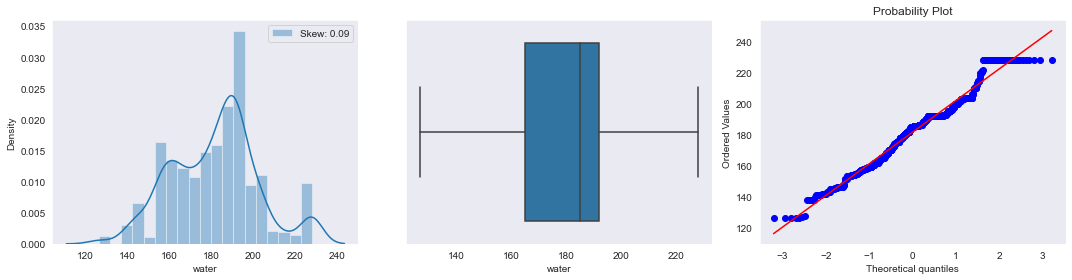

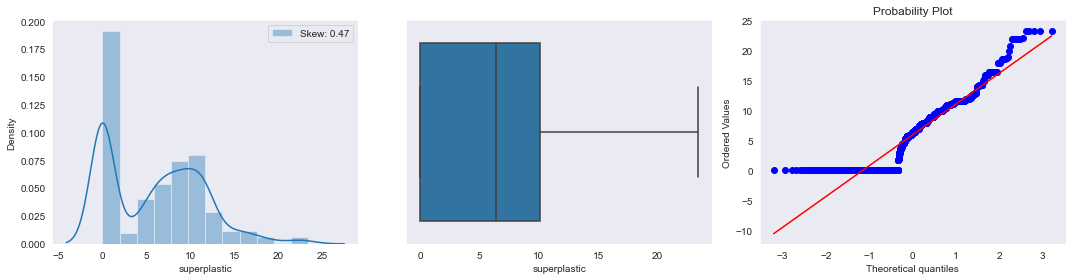

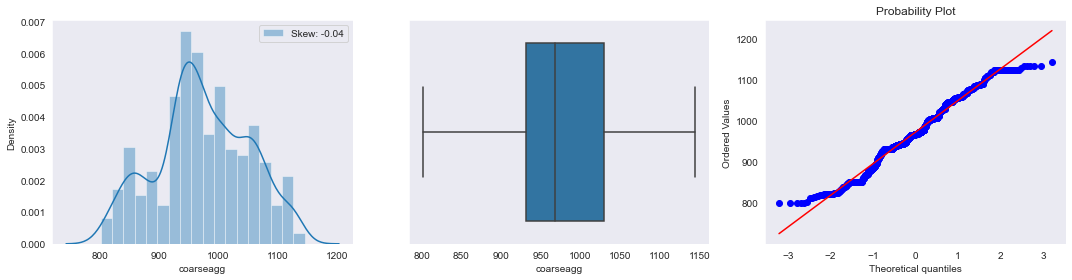

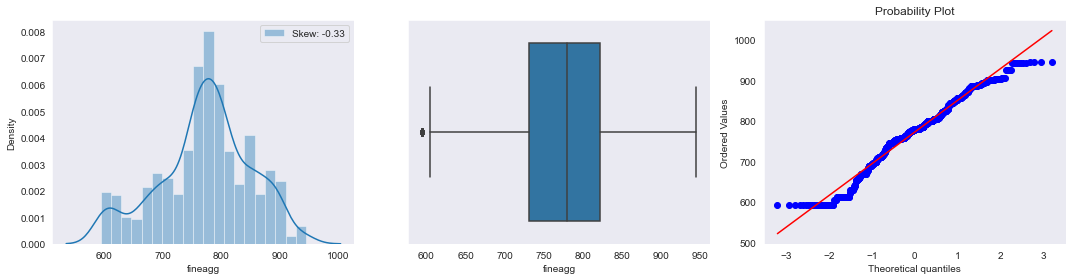

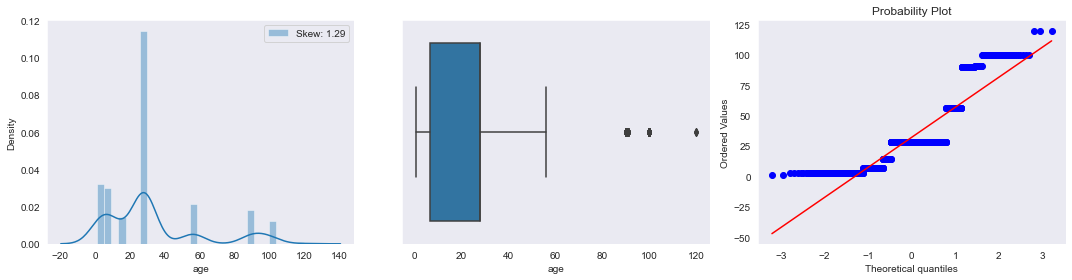

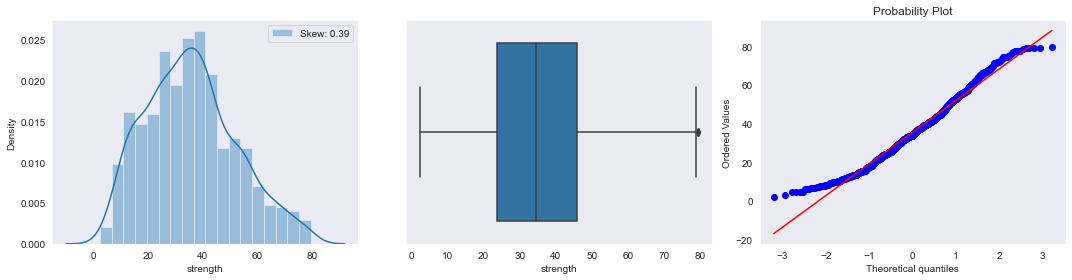

In [29]:
#KDE, Box & Probability plot 

sns.set_style('dark')
for col in df.columns:
    plt.figure(figsize= (15,4))
    plt.subplot(131)
    sns.distplot(df[col],label="Skew: "+ str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col],plot = plt)
    plt.tight_layout()
    plt.show()
    

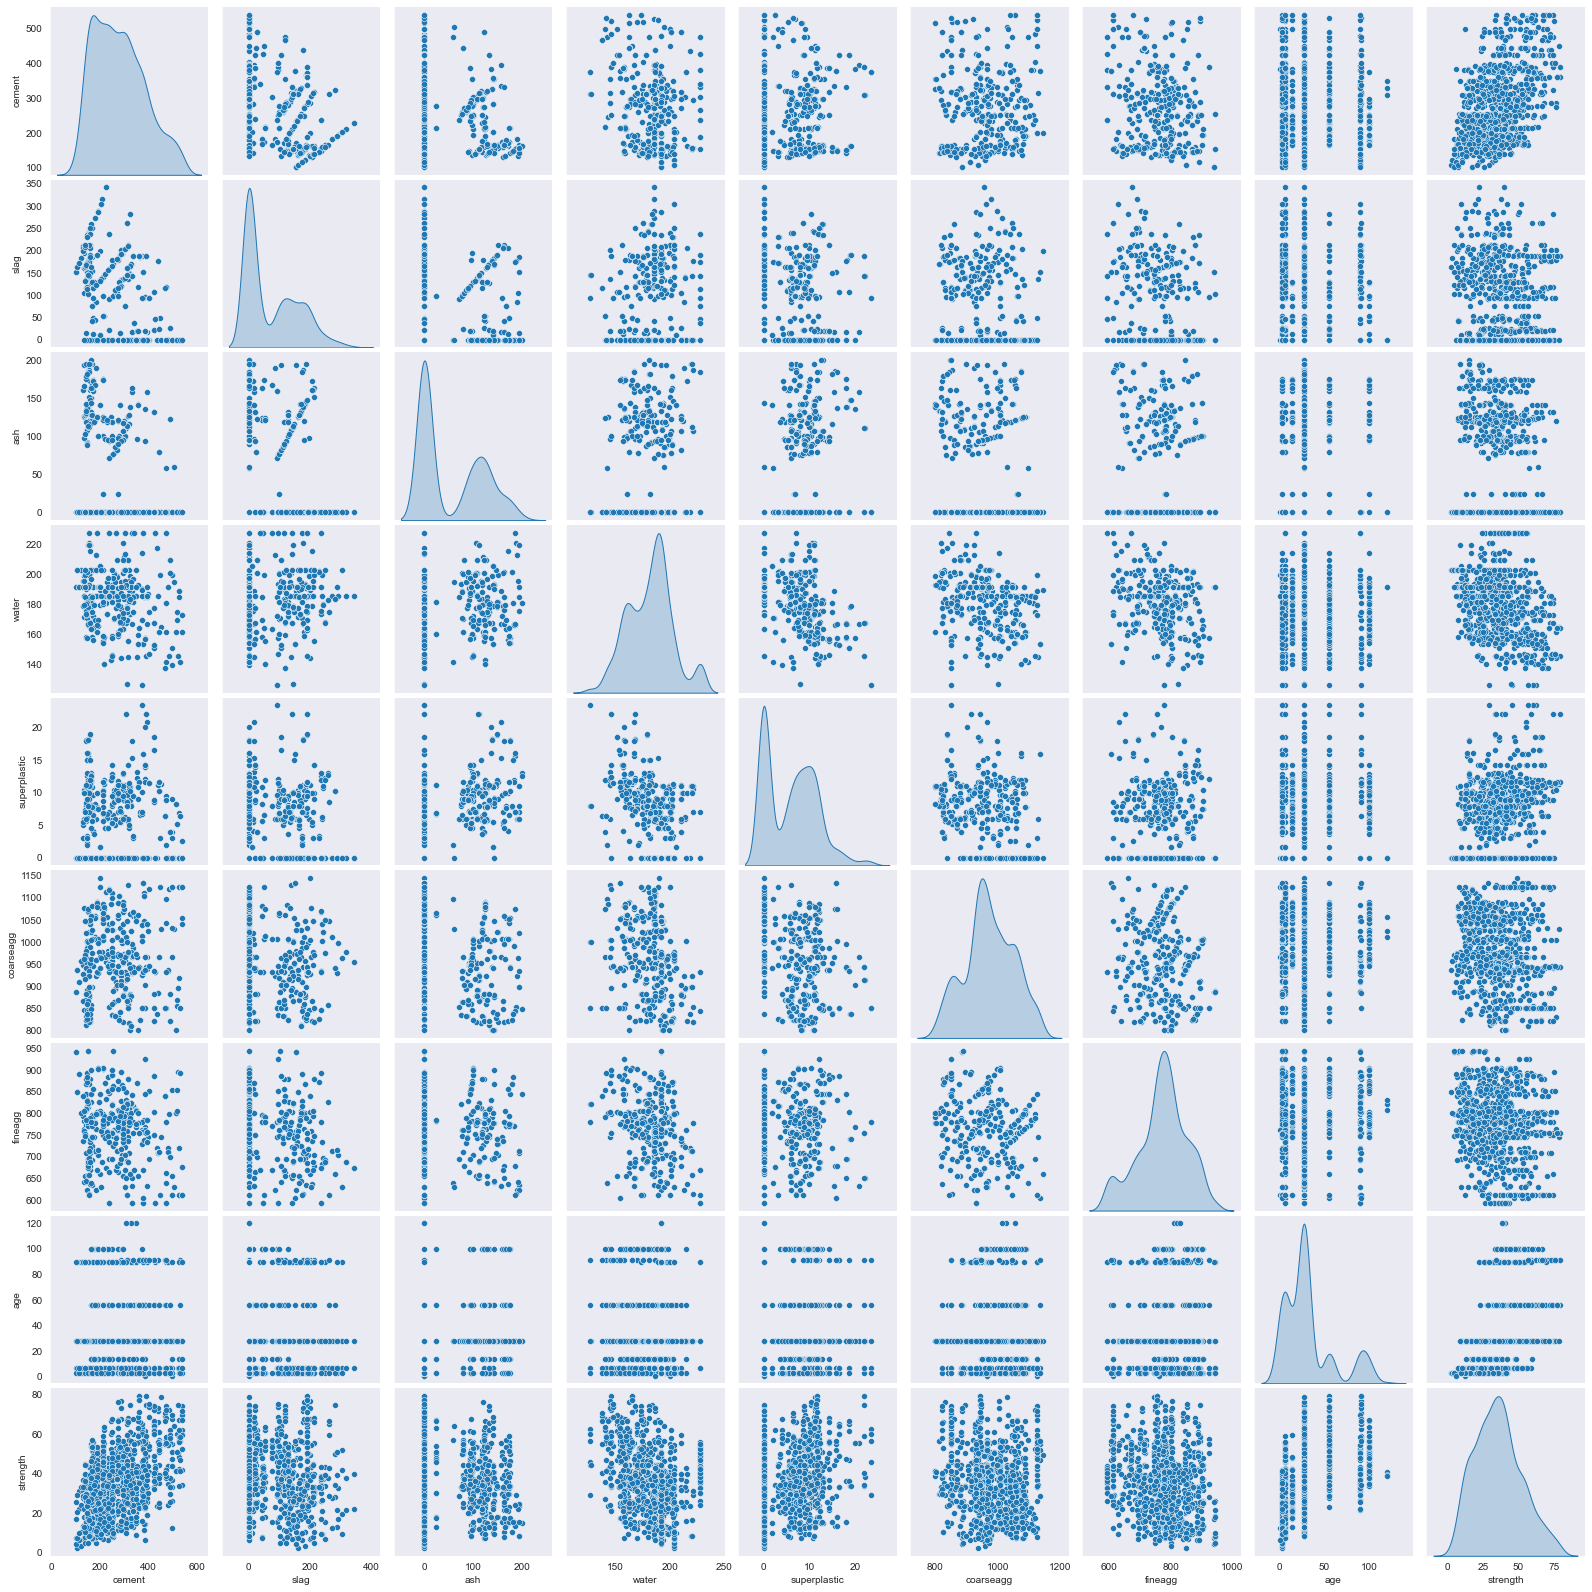

In [30]:
sns.pairplot(data=df,diag_kind='kde')

In [31]:
df.head(1)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30000,212.00000,0.00000,203.50000,0.00000,971.80000,748.50000,28,29.89000


In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
pt=PowerTransformer()
X_normal_transform_arr = pt.fit_transform(X)

In [34]:
X_normal_transformed=pd.DataFrame(X_normal_transform_arr,columns=X.columns)

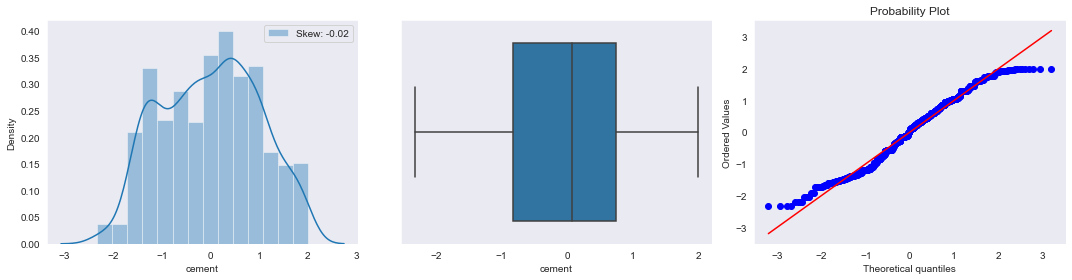

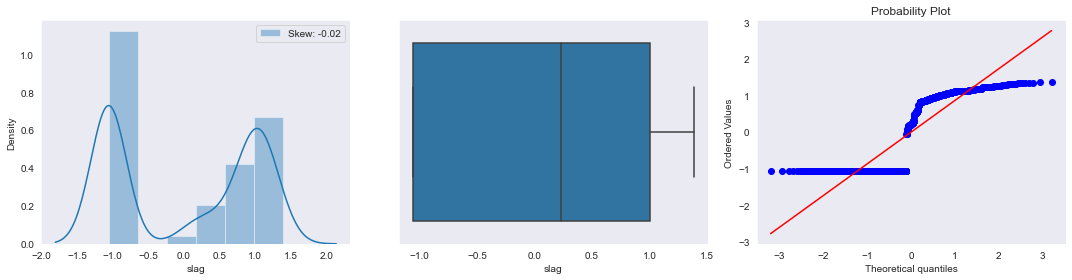

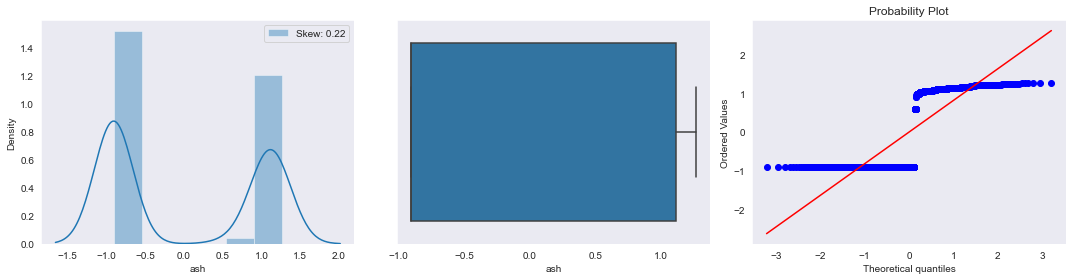

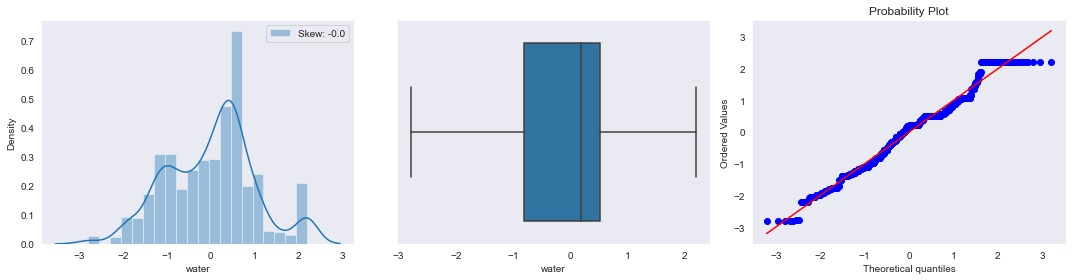

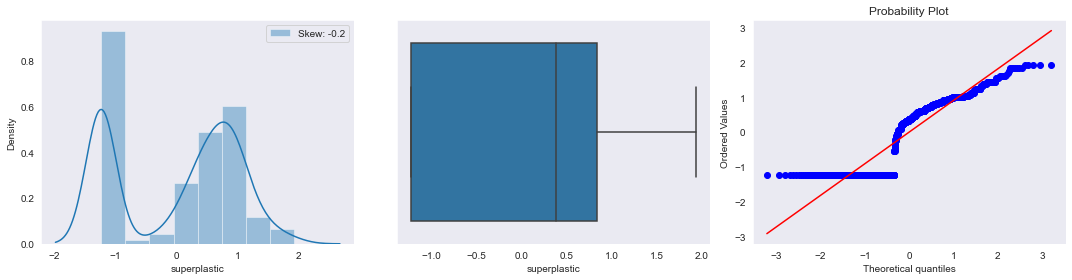

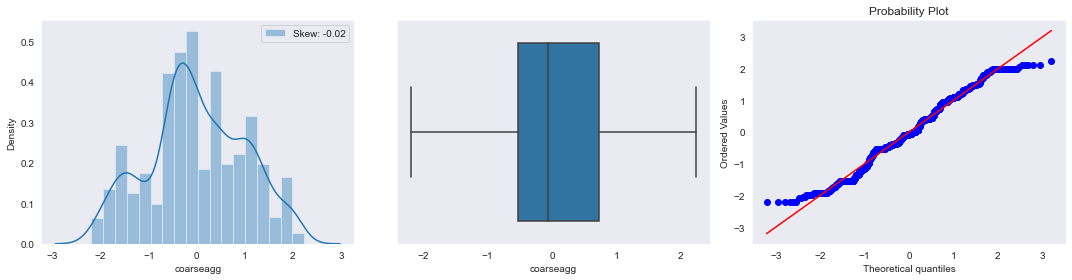

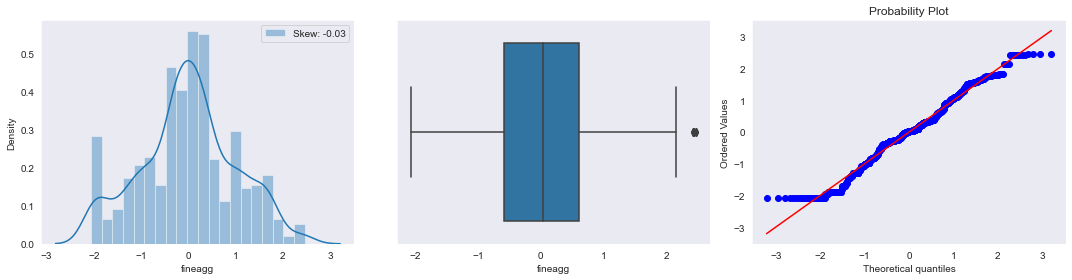

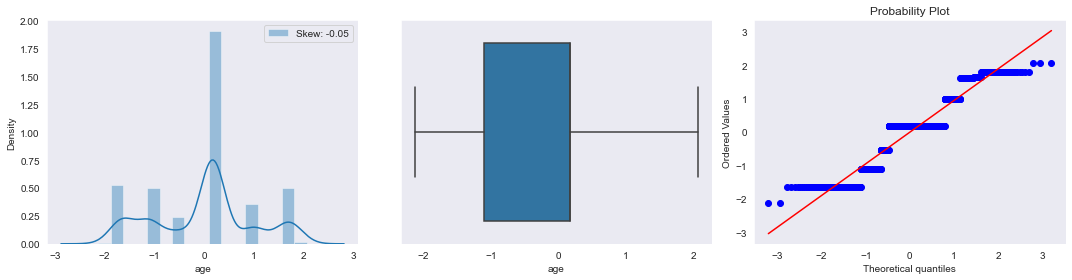

In [35]:
sns.set_style('dark')
for col in X_normal_transformed.columns:
    plt.figure(figsize= (15,4))
    plt.subplot(131)
    sns.distplot(X_normal_transformed[col],label="Skew: "+ str(np.round(X_normal_transformed[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(X_normal_transformed[col])
    plt.subplot(133)
    stats.probplot(X_normal_transformed[col],plot = plt)
    plt.tight_layout()
    plt.show()
    

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_normal_transform_arr,y,test_size=0.2,random_state=42)